In [1]:
import math
import numpy as np
import imageio

from skimage.transform import (hough_line, hough_line_peaks, probabilistic_hough_line)
from skimage.feature import canny
from skimage import data

import scipy.ndimage.filters as filters
import scipy.ndimage as ndimage

import matplotlib.pyplot as plt
from matplotlib import cm

In [10]:
# Using real image
DIR = "data/hough_transform/"
# image = imageio.imread(DIR + "orig.png")
image = imageio.imread(DIR + "example.png")

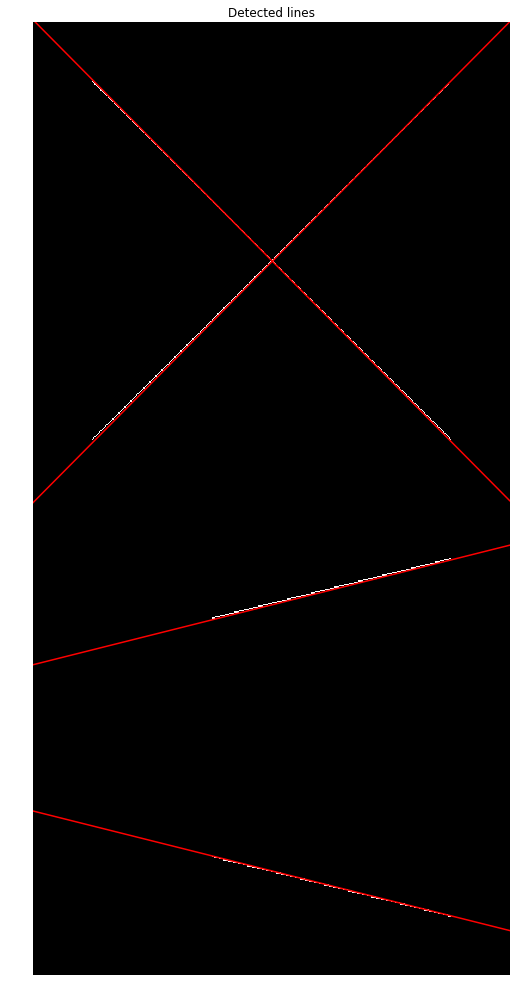

<Figure size 432x288 with 0 Axes>

In [11]:
# Classic straight-line Hough transform
h, theta, d = hough_line(image)

# Generating figure 1
fix, ax = plt.subplots(1, 1, figsize=(8, 14))

ax.imshow(image, cmap=cm.gray)
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - image.shape[1] * np.cos(angle)) / np.sin(angle)
    ax.plot((0, image.shape[1]), (y0, y1), '-r')
ax.set_xlim((0, image.shape[1]))
ax.set_ylim((image.shape[0], 0))
ax.set_axis_off()
ax.set_title('Detected lines')

plt.tight_layout()
plt.show()

# Line finding using the Probabilistic Hough Transform
image = data.camera()
edges = canny(image, 2, 1, 25)
lines = probabilistic_hough_line(edges, threshold=10, line_length=5,
                                 line_gap=3)

plt.tight_layout()
plt.show()
